In [1]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset using sklearn and convert to a DataFrame
try:
    iris_data = load_iris(as_frame=True)
    df = iris_data.frame
    print("✅ Dataset loaded successfully.")
except Exception as e:
    print("❌ Failed to load the dataset:", e)


✅ Dataset loaded successfully.


In [3]:
# Display the first 5 rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Display information about the dataset structure and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# Check if there are any missing values
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
# Drop rows with missing values if any exist
df.dropna(inplace=True)

In [7]:
# Add a column with species names instead of numeric target codes
df['species'] = df['target'].map(dict(enumerate(iris_data.target_names)))
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
# Compute basic statistics of numerical columns
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Median of each numerical column
df.median(numeric_only=True)

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64

In [10]:
# Standard deviation of each numerical column
df.std(numeric_only=True)


sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64

In [11]:
# Group by species and compute the mean for each numerical column
df.groupby('species').mean(numeric_only=True)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [12]:
### 🔍 Observations from Basic Data Analysis

- **Petal Length and Width** clearly differ between species:
  - *Iris-virginica* has the **largest** petals.
  - *Iris-setosa* has the **smallest** petals.
- **Sepal Length** increases slightly from *setosa* to *virginica*, but is less distinctive than petal measurements.
- *Iris-setosa* has a **higher average sepal width** compared to the other species.
- These patterns suggest that petal dimensions are more useful for species classification than sepal dimensions.


SyntaxError: invalid syntax (2124207223.py, line 3)

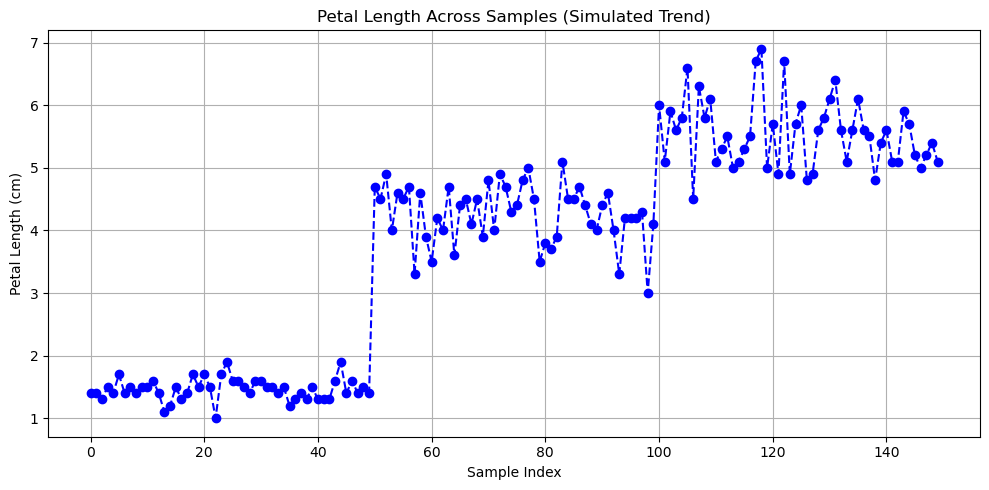

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['petal length (cm)'], color='blue', marker='o', linestyle='--')
plt.title('Petal Length Across Samples (Simulated Trend)')
plt.xlabel('Sample Index')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.tight_layout()
plt.show()

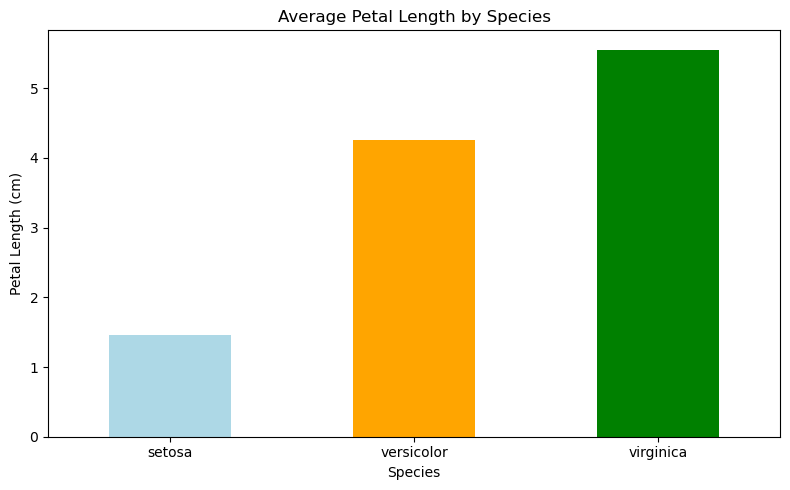

In [14]:
avg_petal = df.groupby('species')['petal length (cm)'].mean()

avg_petal.plot(kind='bar', color=['lightblue', 'orange', 'green'], figsize=(8, 5))
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

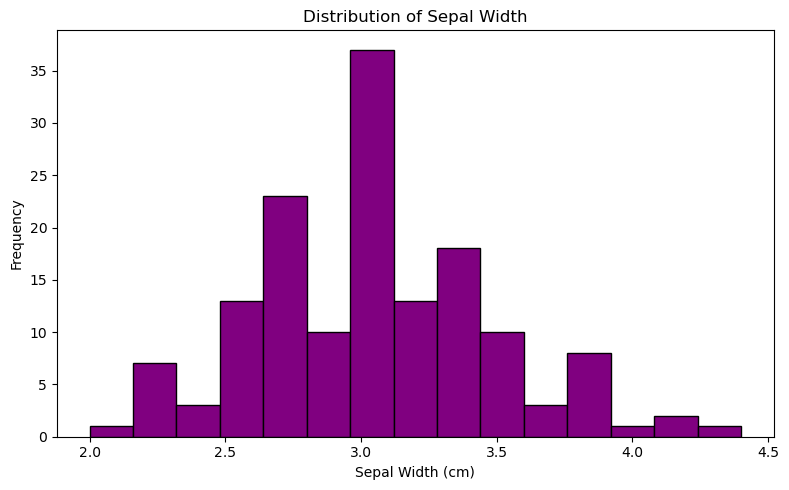

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['sepal width (cm)'], bins=15, color='purple', edgecolor='black')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

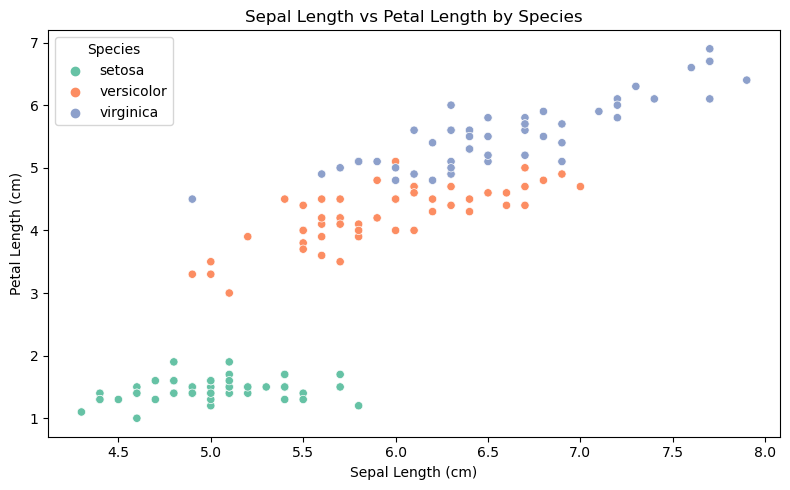

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='Set2')
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()


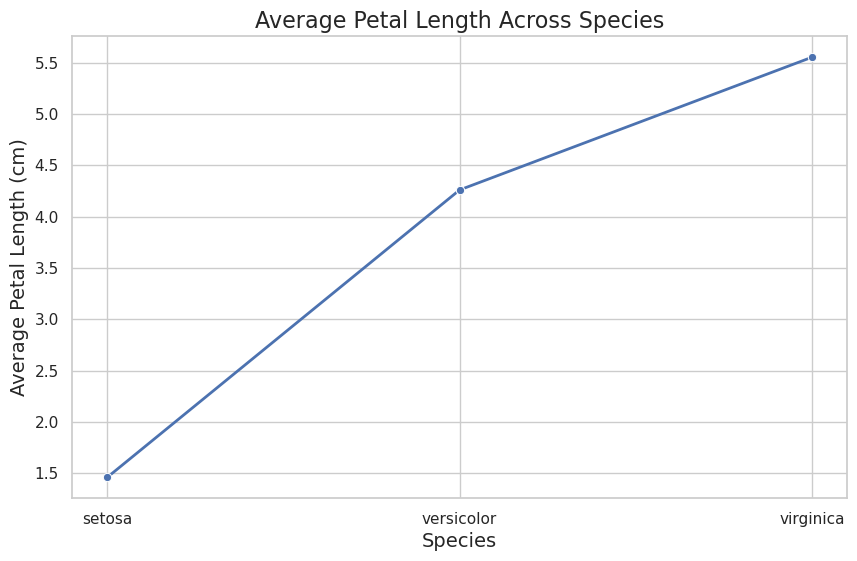

In [18]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Line Chart: Trend of average petal length across species
avg_petal_length = df.groupby('species')['petal length (cm)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_petal_length, x='species', y='petal length (cm)', marker='o', linewidth=2)
plt.title('Average Petal Length Across Species', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Average Petal Length (cm)', fontsize=14)
plt.show()


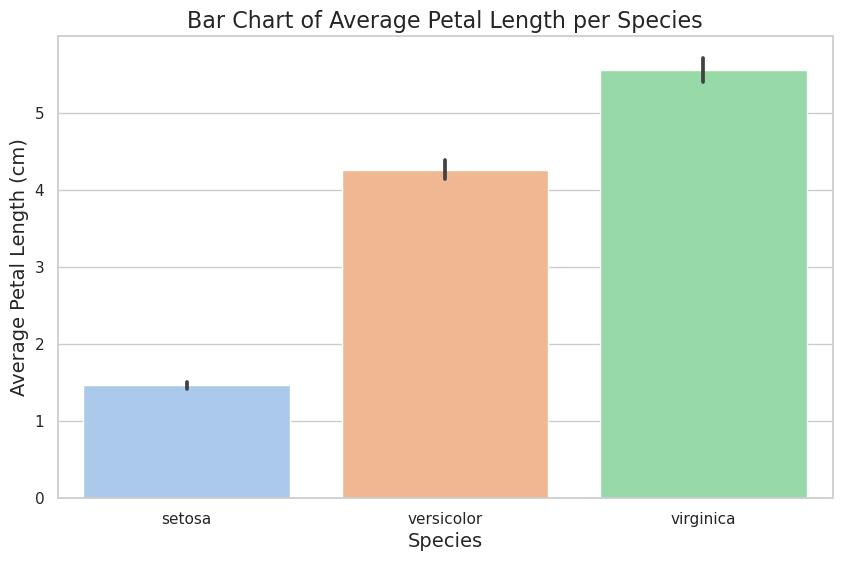

In [19]:
# Set Seaborn style
sns.set(style="whitegrid")
# 2. Bar Chart: Average petal length per species
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='species', y='petal length (cm)', estimator='mean', palette='pastel')
plt.title('Bar Chart of Average Petal Length per Species', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Average Petal Length (cm)', fontsize=14)
plt.show()

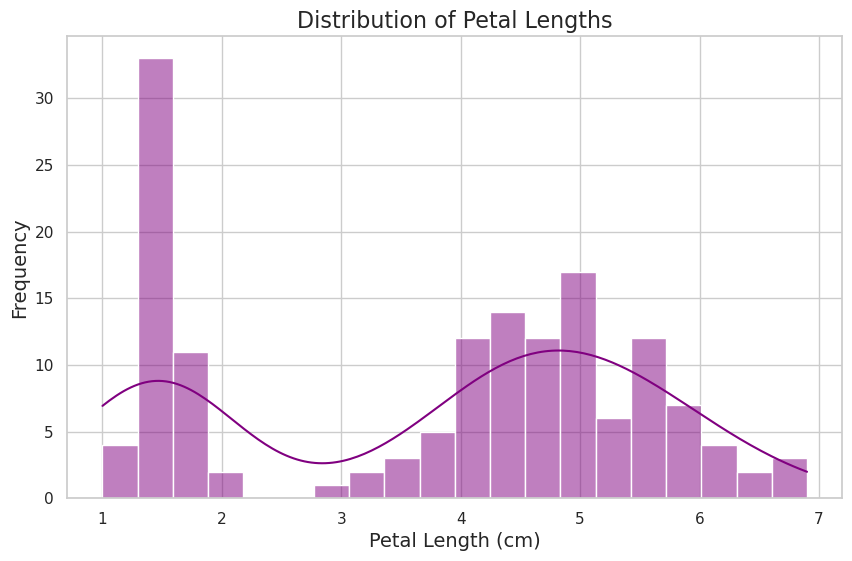

In [20]:
# Set Seaborn style
sns.set(style="whitegrid")
# 3. Histogram: Distribution of petal length
plt.figure(figsize=(10, 6))
sns.histplot(df['petal length (cm)'], bins=20, kde=True, color='purple')
plt.title('Distribution of Petal Lengths', fontsize=16)
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


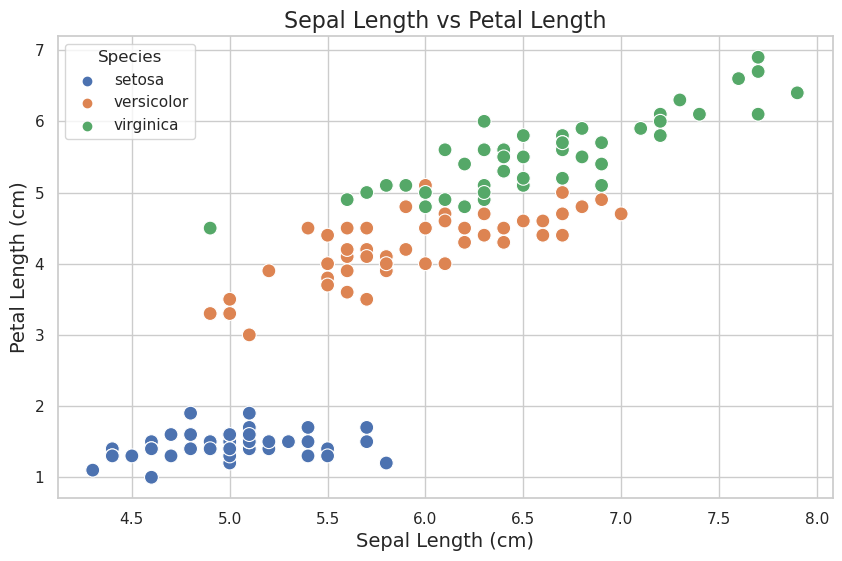

In [21]:
# Set Seaborn style
sns.set(style="whitegrid")
# 4. Scatter Plot: Sepal length vs Petal length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='deep', s=100)
plt.title('Sepal Length vs Petal Length', fontsize=16)
plt.xlabel('Sepal Length (cm)', fontsize=14)
plt.ylabel('Petal Length (cm)', fontsize=14)
plt.legend(title='Species')
plt.show()